***Prince*
101916056
4cs10**

In [96]:

import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math


dataset to dataframe

In [97]:
dtf= pd.read_excel('DATASET.xlsx')
dtf

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.520
1,NaN,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.620
2,NaN,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.680
3,NaN,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.780
4,NaN,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,NaN,6,454.0,931.8,13.6,125.0,13,116,4150,830,15.1,1.8,1.0,15,1.681
1005,NaN,7,454.0,703.0,14.5,17.0,13,118,4150,830,24.6,7.9,2.0,15,1.838
1006,NaN,8,454.0,1124.1,14.9,45.0,18,117,4200,840,119.0,15.7,2.0,16,1.862
1007,NaN,9,454.0,1462.3,13.2,62.0,27,117,4400,720,138.2,30.5,6.0,18,1.883


Preprocessing steps


In [98]:
dtf.fillna(0, inplace=True)

col = 0
for row in range(100):
  dtf.iloc[col:col + 10, 0] = dtf.iloc[col, 0]
  col += 10

In [99]:
data_test = dtf.loc[dtf['year'] == 10]
data_test

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
9,Sec_1,10,324.0,53.6,19.0,0.0,2,105,7567,1885,16.8,105.0,65.0,9,1.960
19,Sec_2,10,327.7,62.0,22.7,0.0,2,102,30525,10234,76.5,44.3,5.0,9,0.795
29,Sec_3,10,487.7,93.2,22.5,0.0,4,110,2140,1270,78.5,0.0,0.0,16,1.432
39,Sec_4,10,543.6,93.2,22.5,0.0,4,110,2140,1270,28.5,60.5,67.0,11,2.004
49,Sec_5,10,434.4,149.0,11.7,72.0,3,110,13142,6225,0.0,276.2,34.0,6,1.792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,0,10,514.0,1226.4,10.1,203.6,16,114,7672,303,219.7,206.2,10.0,8,1.607
978,0,10,901.0,1531.0,11.1,34.9,40,100,15150,1077,5.9,74.5,33.0,13,1.087
988,0,10,1181.0,1364.9,9.2,274.3,24,112,12500,880,131.4,72.4,18.0,12,0.996
998,0,10,662.0,1110.7,12.8,33.2,27,117,3324,1356,193.7,305.6,180.0,12,2.212


In [100]:
dtf.columns = dtf.columns.str.replace('Unnamed: 0', 'Group')
data_test.columns = data_test.columns.str.replace('Unnamed: 0', 'Group')
dtf

,Group,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.520
1,Sec_1,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.620
2,Sec_1,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.680
3,Sec_1,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.780
4,Sec_1,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,0,6,454.0,931.8,13.6,125.0,13,116,4150,830,15.1,1.8,1.0,15,1.681
1005,0,7,454.0,703.0,14.5,17.0,13,118,4150,830,24.6,7.9,2.0,15,1.838
1006,0,8,454.0,1124.1,14.9,45.0,18,117,4200,840,119.0,15.7,2.0,16,1.862
1007,0,9,454.0,1462.3,13.2,62.0,27,117,4400,720,138.2,30.5,6.0,18,1.883


Setting model

In [101]:
model = tree.DecisionTreeRegressor(criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=100,
                    min_impurity_decrease=0.0, 
                    min_samples_leaf=1,
                    min_weight_fraction_leaf=0.1,
                    random_state=1)

In [102]:
predicted = {'Para-9': [], 'Para-10': [], 'Para-11': [], 'Para-12': [], 'Para-13': []}
headers = ['Para-9', 'Para-10', 'Para-11', 'Para-12', 'Para-13']

Rmse value and other calculations


In [103]:
rmse = []
n = 0
idx = 0
for col in [10, 11, 12, 13, 14]:
  res = 0
  count = 0
  for row in range(0, 1000, 10):
    x_train = dtf.iloc[row:row+9, 1:10]
    y_train = dtf.iloc[row:row+9, col]
    x_test = dtf.iloc[row+9, 1:10].to_numpy()
    y_test = dtf.iloc[row+9, col]
    model.fit(x_train, y_train)
    ypred = model.predict(x_test.reshape(1,-1))[0]
    predicted[headers[idx]].append(ypred)
    res += (y_test - ypred)**2
    count += 1
    n += 1
  rmse.append(res)
  idx += 1

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1

In [104]:
dtf_pred = pd.DataFrame.from_dict(predicted)
dtf_pred

,Para-9,Para-10,Para-11,Para-12,Para-13
0,3.4,52.8,57.0,8.0,1.860
1,56.7,30.2,1.0,8.0,0.794
2,71.6,0.0,0.0,14.0,1.390
3,14.5,52.3,51.0,7.0,1.889
4,0.0,253.0,34.0,6.0,1.771
...,...,...,...,...,...
95,0.0,134.2,13.0,5.0,1.423
96,175.8,206.2,9.0,7.0,1.503
97,0.0,30.6,10.0,10.0,1.045
98,1.2,25.8,6.0,8.0,0.782


In [105]:
for i in rmse:
    val = (i/count)**0.5
    print(val)
print((sum(rmse)/500)**0.5)

69.27975534021465
58.82576823977737
23.877009863046084
13.866506409330361
0.2821792692598094
42.47970511700852


In [106]:
import random
getter = []
for i in range(25):
  getter.append(random.randint(0,100))

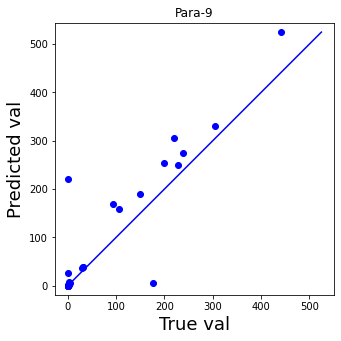

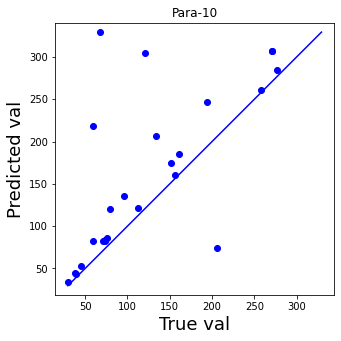

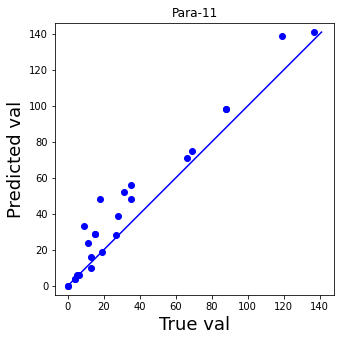

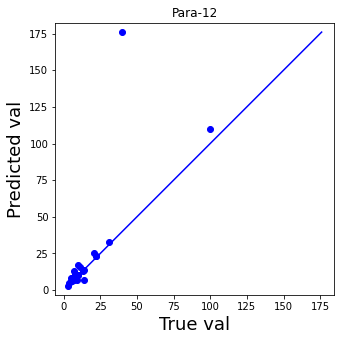

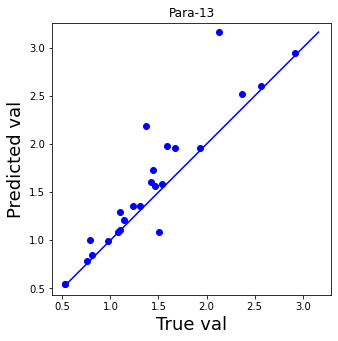

In [107]:
for i in range(5):
  plt.figure(figsize=(5, 5))
  predicted_value_as = data_test.iloc[getter, i + 10]
  true_value_as = dtf_pred.iloc[getter, i]
  plt.scatter(true_value_as, predicted_value_as, c='blue')

  p1 = max(max(predicted_value_as), max(true_value_as))
  p2 = min(min(predicted_value_as), min(true_value_as))
  plt.plot([p1, p2], [p1, p2], 'b-')
  plt.title(headers[i])
  plt.xlabel('True val', fontsize=18)
  plt.ylabel('Predicted val', fontsize=18)
  plt.axis('equal')
  plt.show()

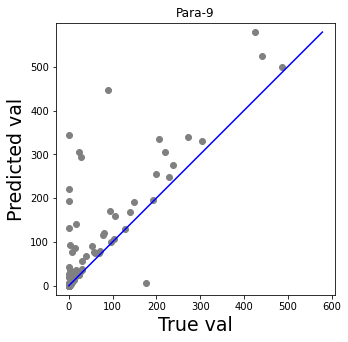

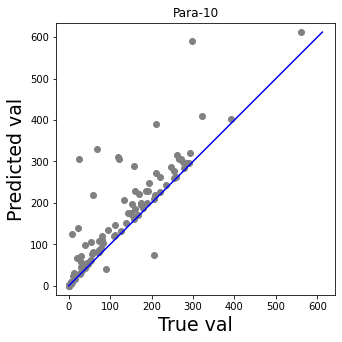

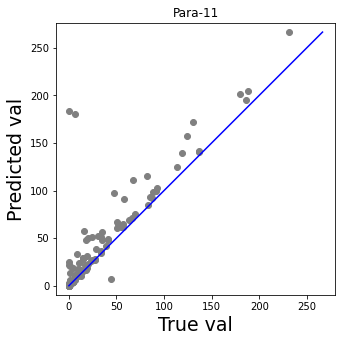

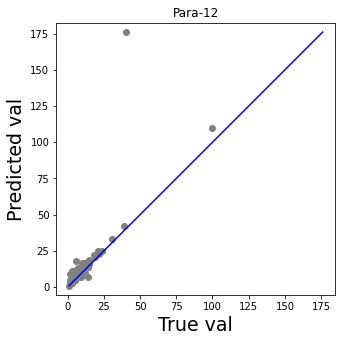

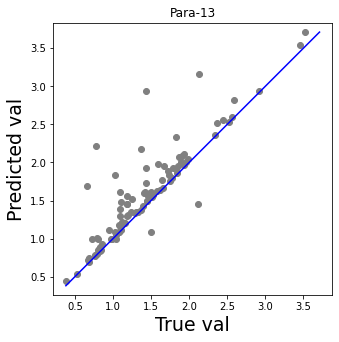

In [108]:
for i in range(5):
  plt.figure(figsize=(5, 5))
  predicted_value_as = data_test.iloc[:, i + 10]
  true_value_as =dtf_pred.iloc[:, i]
  plt.scatter(true_value_as, predicted_value_as, c='gray')

  p2 = min(min(predicted_value_as), min(true_value_as))
  p1 = max(max(predicted_value_as), max(true_value_as))
  plt.plot([p1, p2], [p1, p2], 'b-')
  plt.title(headers[i])
  plt.xlabel('True val', fontsize=19)
  plt.ylabel('Predicted val', fontsize=19)
  plt.axis('equal')
  plt.show()